In [1]:
# importing diabeties data
import pandas as pd
data = pd.read_csv('D:/MSBA/10 Applied Machine Learning/assignment/2/adult_income.csv')
print(data.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country Income level  
0          2174             0              40  United-States        <=50K  
1             0             0 

In [2]:
data.shape

(32561, 15)

In [3]:
data.select_dtypes('int64').columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [4]:
new_data = pd.get_dummies(data)
new_data = new_data.drop(columns = ['workclass_?','education_10th','marital-status_Divorced','occupation_?','relationship_Husband','race_Amer-Indian-Eskimo','sex_Female','native-country_?','Income level_ <=50K'])
print(new_data.shape)

(32561, 101)


In [5]:
# deviding data into features and outcome
X = new_data.iloc[:,:-1]
y = new_data.iloc[:,-1]
print(X.shape, y.shape)

(32561, 100) (32561,)


In [6]:
# dividing dataset into traing and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
print(X_train.shape, X_test.shape)

(22792, 100) (9769, 100)


In [7]:
# fitting decision tree model to predict outcome
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

dt_train_accu, dt_val_accu = [],[]

for i in range(2,15):
    dt_clf = DecisionTreeClassifier(random_state = 42, max_depth = i)
    cv_results = cross_validate(dt_clf, X_train,y_train,scoring = 'accuracy', return_train_score = True, cv = 5)
    #print(cv_results)
    dt_train_accu.append(cv_results['train_score'].mean())
    dt_val_accu.append(cv_results['test_score'].mean())
    
    
print("Train accuracy of DT: ", dt_train_accu)
print("Validation accuracy of DT: ",dt_val_accu)

Train accuracy of DT:  [0.8269129732376286, 0.8427408741694137, 0.8485762425025785, 0.8547735948682919, 0.8564298715210382, 0.8596656319487248, 0.8653584853200144, 0.8703712350818618, 0.875570418405976, 0.8816799961381567, 0.8879651074955903, 0.8951825298471053, 0.9032007035157934]
Validation accuracy of DT:  [0.8264744078273789, 0.8422254874791191, 0.8479292433585058, 0.8529308214590887, 0.8531503698913804, 0.8526677405448682, 0.854598373401692, 0.8551249201327144, 0.8545106541034464, 0.8526677597899971, 0.8506934019999537, 0.8480608992863907, 0.8443753800912989]


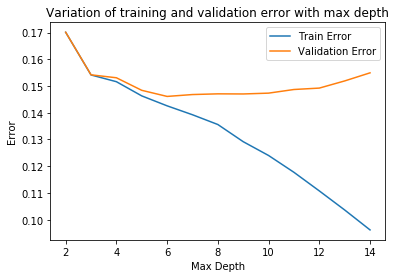

In [9]:
# plotting train and validation error with max_depth to finalize hyperparameter
import matplotlib.pyplot as plt
plt.plot(range(2,15), [1-i for i in dt_train_accu], label = 'Train Error')
plt.plot(range(2,15),[1-i for i in dt_val_accu], label = 'Validation Error')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('Variation of training and validation error with max depth')
plt.show()

In [10]:
# creating final tree with max_depth of 5 after analyzing above chart
dt_clf_final = DecisionTreeClassifier(random_state = 42, max_depth = 5)
dt_clf_final.fit(X_train,y_train)

# predicting the accuracy of model with test data set
print('test accuracy:', dt_clf_final.score(X_test,y_test))

test accuracy: 0.8505476507319071


In [11]:
# understanding the importance of different features for classification
importance = dt_clf_final.feature_importances_

col_imp = pd.DataFrame({'Column':X_train.columns, 'Importance':importance})
print(col_imp.sort_values('Importance', ascending = False).head())   

                               Column  Importance
30  marital-status_Married-civ-spouse    0.460458
2                       education-num    0.231698
3                        capital-gain    0.211376
4                        capital-loss    0.070832
5                      hours-per-week    0.019297


In [20]:
# using GridSearchCV to estimate number of estimators and max_depth of decision tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), random_state = 42)

param_grid = {'base_estimator__max_depth': [2,4,6,8,10], 'n_estimators': [10,20,30,40,50]}

gscv_clf = GridSearchCV(estimator = ada_clf, param_grid = param_grid,scoring ='accuracy',cv = 3,return_train_score = True)

gscv_clf.fit(X_train,y_train)

print('Best Parameter: ',gscv_clf.best_params_, 'Best Score: ',gscv_clf.best_score_)

Best Parameter:  {'base_estimator__max_depth': 2, 'n_estimators': 50} Best Score:  0.864031239031239


In [18]:
# estimating income class using AdaBoostClassifier
#from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_validate
abc_clf = AdaBoostClassifier(random_state = 42)
abc_train_accu, abc_val_accu = [],[]

for i in range(2,10):
    abc_clf.set_params(base_estimator = DecisionTreeClassifier(max_depth = i), n_estimators = 20)
    cv_results = cross_validate(abc_clf, X_train,y_train,scoring = 'accuracy', return_train_score = True, cv = 3)
    #print(cv_results)
    abc_train_accu.append(cv_results['train_score'].mean())
    abc_val_accu.append(cv_results['test_score'].mean())
    
print("Training Set Score:", abc_train_accu)
print('Validation Set Score:', abc_val_accu)

Training Set Score: [0.8606968014960156, 0.873727641894169, 0.8818445346441733, 0.8916505867465362, 0.9068533125646127, 0.9220779017897719, 0.9390794317373768, 0.9677738389571436]
Validation Set Score: [0.8577132610394725, 0.863592682485775, 0.8610916028570917, 0.8557388089850285, 0.847665989524573, 0.8402948955031119, 0.8316952348006293, 0.8244121950069903]


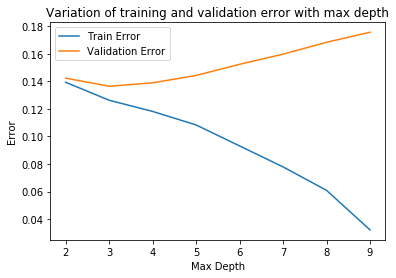

In [19]:
# plotting train and validation error with max_depth to finalize hyperparameter
import matplotlib.pyplot as plt
plt.plot(range(2,10), [1-i for i in abc_train_accu], label = 'Train Error')
plt.plot(range(2,10),[1-i for i in abc_val_accu], label = 'Validation Error')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('Variation of training and validation error with max depth')
plt.show()

In [15]:
# creating final boosting model with max_depth of 3 after analyzing above chart
abc_clf_final = AdaBoostClassifier(random_state = 42, base_estimator = DecisionTreeClassifier(max_depth = 3), n_estimators = 20)
abc_clf_final.fit(X_train,y_train)

# predicting the accuracy of model with test data set
print('test accuracy:', abc_clf_final.score(X_test,y_test))

test accuracy: 0.8650834271675709


In [17]:
# understanding the importance of different features for classification for AdaBoostClassifier
importance = abc_clf_final.feature_importances_

col_imp = pd.DataFrame({'Column':X_train.columns, 'Importance':importance})
print(col_imp.sort_values('Importance', ascending = False).head())  

           Column  Importance
0             age    0.166085
3    capital-gain    0.148757
4    capital-loss    0.097323
2   education-num    0.071711
5  hours-per-week    0.068025


In [8]:
# sampling the data for SVMs as they take long time to train
# Checking distrubution of av_run_binary before sampling
print(new_data[['Income level_ >50K','age']].groupby('Income level_ >50K').count())
# sampling 10K observations from pool of 140K observartions
data_sub = new_data.sample(n = 10000, random_state = 42)
print(data_sub[['Income level_ >50K','age']].groupby('Income level_ >50K').count())

                      age
Income level_ >50K       
0                   24720
1                    7841
                     age
Income level_ >50K      
0                   7628
1                   2372


In [12]:
# estimating income class using SVC, with just relevent factors from above learnings
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
svc_clf = SVC(random_state = 42)
svc_train_accu, svc_val_accu = [],[]

imp_cols = ['marital-status_Married-civ-spouse','education-num','capital-gain','capital-loss','age','hours-per-week',
            'relationship_Wife','marital-status_Married-AF-spouse','native-country_Iran','relationship_Other-relative']

# creating training and validation datasets from X_train
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(data_sub[imp_cols], data_sub.iloc[:,-1], test_size = 0.3)

for ker in ['rbf', 'linear', 'sigmoid']:
    svc_clf.set_params(kernel = ker)
    svc_clf.fit(X_train_imp, y_train_imp)
    svc_train_accu.append(svc_clf.score(X_train_imp,y_train_imp))
    svc_val_accu.append(svc_clf.score(X_test_imp,y_test_imp))


print("Training Set Score:", svc_train_accu)
print('Validation Set Score:', svc_val_accu)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training Set Score: [0.8824285714285715, 0.8204285714285714, 0.7617142857142857]
Validation Set Score: [0.8236666666666667, 0.8316666666666667, 0.7653333333333333]


In [9]:
# creating final SVC model with 'rbf' kernel
from sklearn.svm import SVC
imp_cols = ['marital-status_Married-civ-spouse','education-num','capital-gain','capital-loss','age','hours-per-week',
            'relationship_Wife','marital-status_Married-AF-spouse','native-country_Iran','relationship_Other-relative']
svc_clf_final = SVC(random_state = 42, kernel = 'rbf')
svc_clf_final.fit(data_sub[imp_cols], data_sub.iloc[:,-1])

# predicting the accuracy of model with test data set
print('test accuracy:', svc_clf_final.score(X_test[imp_cols],y_test))

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


test accuracy: 0.8450199611014434
